In [ ]:
데이터 뽑기 -application_record
 
CODE_GENDER 여자 
AMT_INCOME_TOTAL 150000 이상 
NAME_INCOME_TYPE Working (근로자)
DAYS_EMPLOYED -730 (이하인사람) (양수값은 실업자 . )
# FLAG_MOBIL True (휴대폰 번호기입 여부) 0 == 기입거부  || FLAG_EMAIL True  

FLAG_OWN_CAR True (이중 차가 있는사람)  #&& FLAG_OWN_REALTY True (부동산 이 있는사람)
 
데이터 뽑기 - credit

MONTHS_BALANCE -6 (6개월 남음) 
STATUS  1   (대출상환여부가 1달 이상인사람 )

In [92]:
import pandas as pd

credit =pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/archive/credit_record.csv")
#c 상환여부 , 숫자 : 숫자만큼 밀림,  X 연체없음 
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [91]:
application = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/archive/application_record.csv")
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


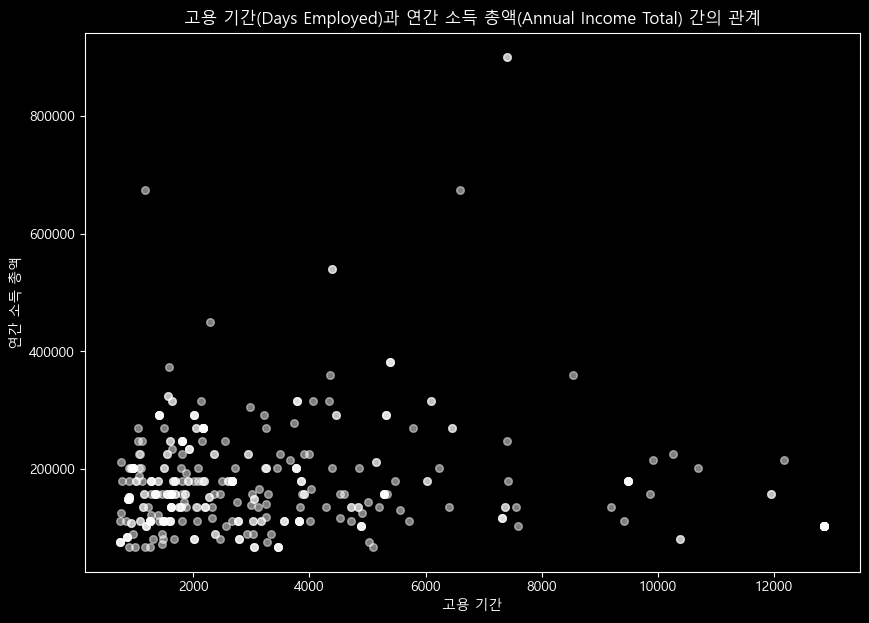

In [202]:
import matplotlib.pyplot as plt 
import os
import warnings
warnings.filterwarnings('ignore')

#한글작성 가능
plt.style.use("dark_background")
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
    
# 여자, 소득이 50000 이상, 근로자 , 730 이상 일하고 
app = application[(application['CODE_GENDER'] == 'F') &
         (application['AMT_INCOME_TOTAL'] >= 50000) &
         (application['NAME_INCOME_TYPE'] == 'Working') &
         (application['DAYS_EMPLOYED'] <= -730)] 

# 상환달이 6 개월이내 중 대출 상환여부가 1달인 사람들만 
cre = credit[(credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "1")]
 
# 두개를 합친 DF 
df = app.merge(cre)

# 그중에 ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'STATUS'만 뽑아냄 
new_df = df[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'STATUS']]

# new_df
#그중 DaysEmployed 가 일한수가 - 로 되있어서 + 로 다바꿔줌 
new_df.loc[:, "DAYS_EMPLOYED"] = new_df["DAYS_EMPLOYED"].abs()


# 산점로 2년 이상 일한사람중 여자, 소득이 50000 이상, 근로자 , 상환달이 6 개월이내 중 대출 상환여부가 1달인 사람들만 
# 뽑아서 그래프로 표현  
plt.figure(figsize = (10, 7))
plt.scatter(new_df["DAYS_EMPLOYED"], new_df["AMT_INCOME_TOTAL"], alpha=0.5 ,color= "white" ,  s=30)
plt.xlabel('고용 기간')
plt.ylabel('연간 소득 총액')
plt.title('고용 기간(Days Employed)과 연간 소득 총액(Annual Income Total) 간의 관계')
plt.show() 

#궁극적으로 여자중  2000일(1600~1800 사이(약4~ 5년) 사이가 연간소득총액이 170000 부근으로 많고 16년동안 일한사람의 수는 극도로 작다)

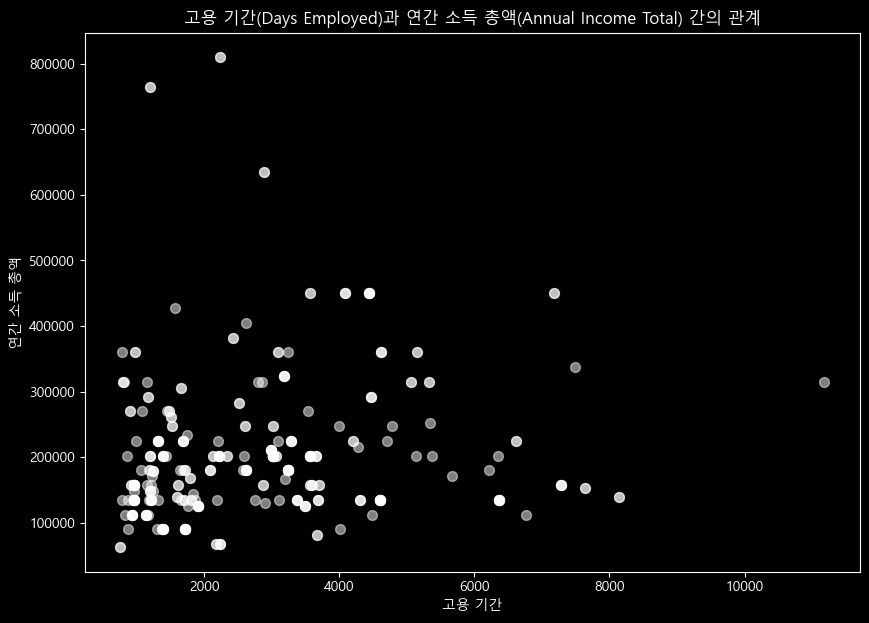

In [203]:
#남자로 보기 
    
# 남자, 소득이 50000 이상, 근로자 , 730 이상 일하고 
app2 = application[(application['CODE_GENDER'] == 'M') &
         (application['AMT_INCOME_TOTAL'] >= 50000) &
         (application['NAME_INCOME_TYPE'] == 'Working') &
         (application['DAYS_EMPLOYED'] <= -730)] 

# 상환달이 6 개월이내 중 대출 상환여부가 1달인 사람들만 
cre2 = credit[(credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "1")]


# 두개를 합친 DF 
df2 = app2.merge(cre2)

# 그중에 ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'STATUS'만 뽑아냄 
new_df2 = df2[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'STATUS']]

# new_df
#그중 DaysEmployed 가 일한수가 - 로 되있어서 + 로 다바꿔줌 
new_df2.loc[:, "DAYS_EMPLOYED"] = new_df2["DAYS_EMPLOYED"].abs()


# 산점로 2년 이상 일한사람중 여자, 소득이 50000 이상, 근로자 , 상환달이 6 개월이내 중 대출 상환여부가 1달인 사람들만 
# 뽑아서 그래프로 표현  
plt.figure(figsize = (10, 7))
plt.scatter(new_df2["DAYS_EMPLOYED"], new_df2["AMT_INCOME_TOTAL"], alpha=0.5 ,color= "white" ,  s = 50) 
plt.xlabel('고용 기간')
plt.ylabel('연간 소득 총액')
plt.title('고용 기간(Days Employed)과 연간 소득 총액(Annual Income Total) 간의 관계')
plt.show() 

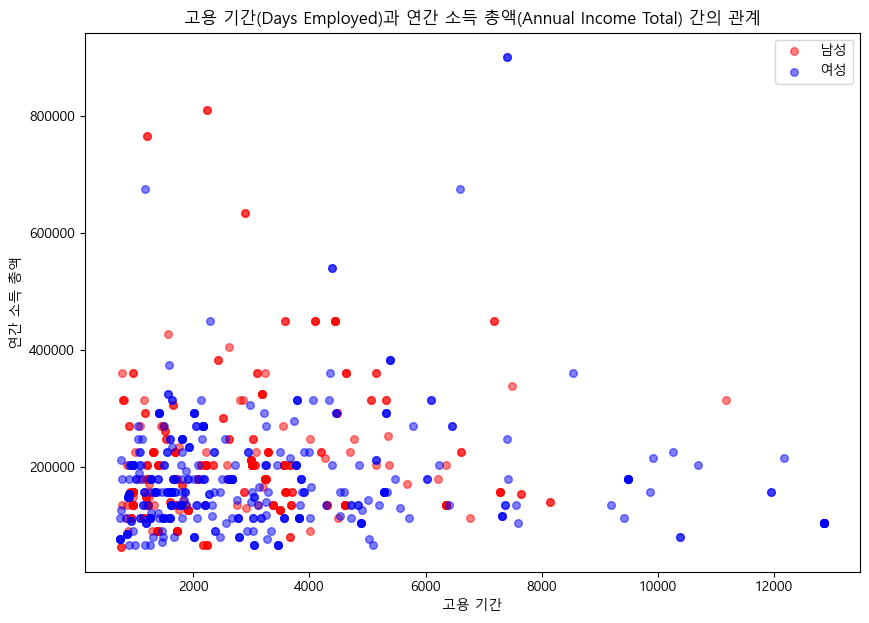

In [204]:
#남여 합친것 

#한글작성 가능
plt.style.use("default")
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
    
plt.figure(figsize = (10, 7))
plt.scatter(new_df2["DAYS_EMPLOYED"], new_df2["AMT_INCOME_TOTAL"], alpha=0.5 ,color= "red" ,  s = 30, label ="남성")
plt.scatter(new_df["DAYS_EMPLOYED"], new_df["AMT_INCOME_TOTAL"], alpha=0.5 ,color= "blue" ,  s = 30 , label = '여성')
plt.xlabel('고용 기간')
plt.ylabel('연간 소득 총액')
plt.title('고용 기간(Days Employed)과 연간 소득 총액(Annual Income Total) 간의 관계')
plt.legend()
plt.show() 

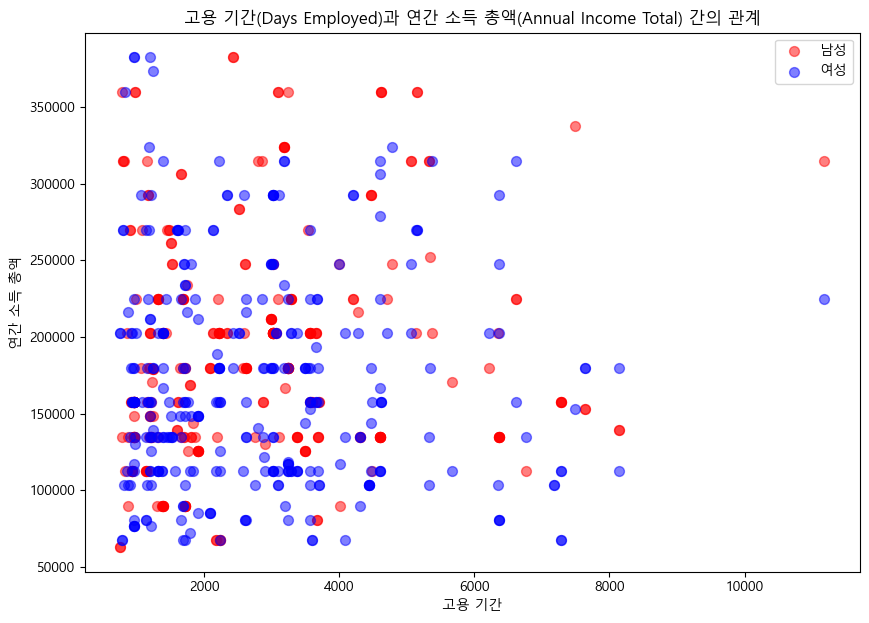

In [135]:
#줄여서 보기 50000~ 400000 사이 
app3 = application[(application['CODE_GENDER'] == 'M') &
                   (application['AMT_INCOME_TOTAL'].between(50000, 400000)) &
                   (application['NAME_INCOME_TYPE'] == 'Working') &
                   (application['DAYS_EMPLOYED'] <= -730)]

app4 = application[(application['CODE_GENDER'] == 'F') &
                   (application['AMT_INCOME_TOTAL'].between(50000, 400000)) &
                   (application['NAME_INCOME_TYPE'] == 'Working') &
                   (application['DAYS_EMPLOYED'] <= -730)]


cre3 = credit[(credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "1")]
cre4 = credit[(credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "1")]

df3 = app3.merge(cre3)
df4 = app4.merge(cre4)
 
new_df3 = df3[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'STATUS']]
new_df4 = df4[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED', 'MONTHS_BALANCE', 'STATUS']]
 
new_df3.loc[:, "DAYS_EMPLOYED"] = new_df3["DAYS_EMPLOYED"].abs()
new_df4.loc[:, "DAYS_EMPLOYED"] = new_df2["DAYS_EMPLOYED"].abs()



plt.figure(figsize = (10, 7))
plt.scatter(new_df3["DAYS_EMPLOYED"], new_df3["AMT_INCOME_TOTAL"], alpha=0.5 ,color= "red" ,  s = 50, label ="남성")
plt.scatter(new_df4["DAYS_EMPLOYED"], new_df4["AMT_INCOME_TOTAL"], alpha=0.5 ,color= "blue" ,  s = 50 , label = '여성')
plt.xlabel('고용 기간')
plt.ylabel('연간 소득 총액')
plt.title('고용 기간(Days Employed)과 연간 소득 총액(Annual Income Total) 간의 관계')
plt.legend()
plt.show() 

In [ ]:
결론 : 조건을 준 데이터가 기본적으로 여성이 많고 여성이 대체적으로  2000일(1600~1800 사이(약4~ 5년)) 사이가 
       연간소득총액이 170000 부근으로 많고 16년동안 일한사람의 수는 극도로 적다
       
       남성의 경우 연간소득총액이 여성에 비해 다양하게 분포되있지만 그래도 200000 부근에 대체적으로 분포되어있고
       여성에 비해 16년 이상 일한사람의 수는 여성보다 더 적다
    
       남성이 대체적으로 일한 년수에비해 많이 받는경향이 있으며 , 여성은 연간소득이 대체적으로 크게 눈에 뛰진않음
       

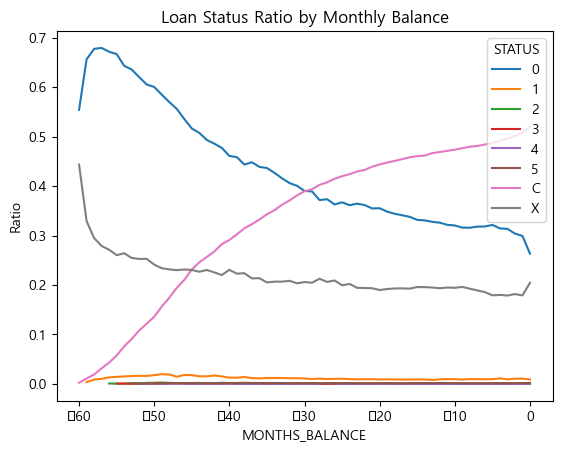

In [130]:
import matplotlib.pyplot as plt

gr = credit.groupby('MONTHS_BALANCE')['STATUS'].value_counts(normalize=True).unstack()
gr.plot()

plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Ratio')
plt.title('Loan Status Ratio by Monthly Balance')
plt.legend(title='STATUS')
plt.show() 

<Figure size 1000x300 with 0 Axes>

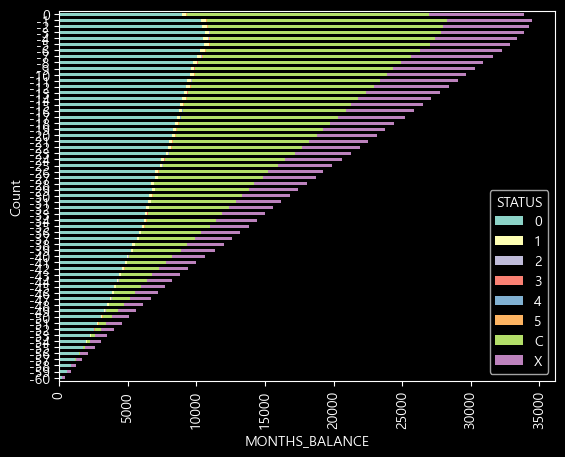

In [214]:
import matplotlib.pyplot as plt

status_counts = credit.groupby('MONTHS_BALANCE')['STATUS'].value_counts().unstack()

plt.figure(figsize= (10,3))
status_counts.plot(kind='barh', stacked=True)

plt.xticks(rotation= 90)
plt.xlabel('MONTHS_BALANCE')
plt.ylabel('Count')
plt.legend(title='STATUS')
plt.show()


In [ ]:
데이터 뽑기 -application_record
 
CODE_GENDER 
AMT_INCOME_TOTAL 
NAME_INCOME_TYPE Working (근로자 타입)
DAYS_EMPLOYED 가 365 일 이상. 

데이터 뽑기 - credit
MONTHS_BALANCE -6 (6개월 남음) 
STATUS  1   (대출상환여부가 1달 이상인사람 )

In [205]:
# 여자, 소득이 50000 이상, 근로자 , 730 이상 일하고 
app = application[(application['CODE_GENDER'] == 'F') & 
         (application['DAYS_EMPLOYED'] <= -365)] 

# 상환달이 6 개월이내 중 대출 상환여부가 1달인 사람들만 
cre = credit[(credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "1") | 
            (credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "0")]
 
# 두개를 합친 DF 
df = app.merge(cre)

# 그중에 ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS'만 뽑아냄 
new_df = df[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS']]
new_df

,ID,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,MONTHS_BALANCE,STATUS
0,5008808,F,270000.0,Commercial associate,0,0
1,5008808,F,270000.0,Commercial associate,-2,0
2,5008825,F,130500.0,Working,0,0
3,5008825,F,130500.0,Working,-1,0
4,5008825,F,130500.0,Working,-2,0
...,...,...,...,...,...,...
26591,5150049,F,283500.0,Working,-2,0
26592,5150049,F,283500.0,Working,-3,0
26593,5150049,F,283500.0,Working,-4,0
26594,5150049,F,283500.0,Working,-5,0


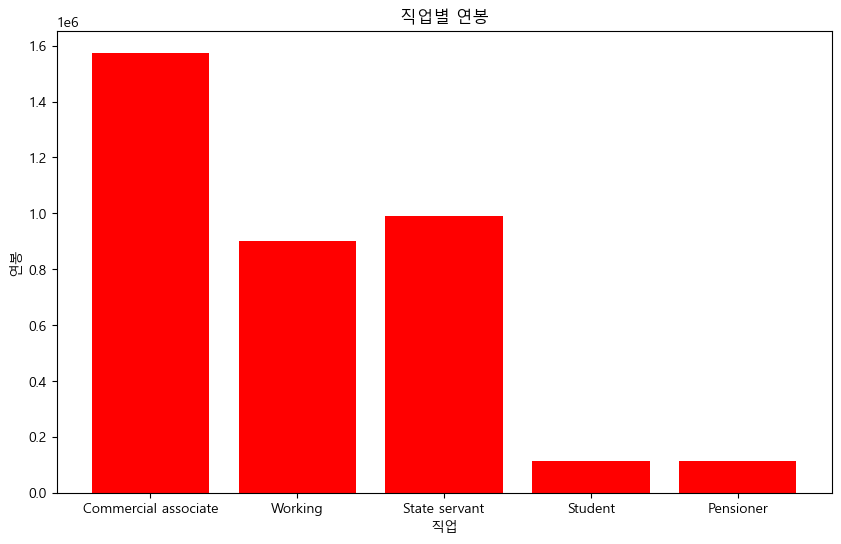

In [206]:
import matplotlib.pyplot as plt

#여성의 직업별 소득 
plt.figure(figsize=(10, 6))
plt.bar(new_df['NAME_INCOME_TYPE'], new_df['AMT_INCOME_TOTAL'], color = "r")
plt.xlabel('직업')
plt.ylabel('연봉')
plt.title('직업별 연봉')
plt.xticks(rotation=0)
plt.show() 

In [207]:
# 남자, 소득이 50000 이상, 근로자 , 730 이상 일하고 
app2 = application[(application['CODE_GENDER'] == 'M') & 
         (application['DAYS_EMPLOYED'] <= -365)] 

# 상환달이 6 개월이내 중 대출 상환여부가 1달인 사람들만 
cre2 = credit[(credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "1") | 
            (credit['MONTHS_BALANCE'] >= -6) &
             (credit['STATUS'] == "0")]
 
# 두개를 합친 DF 
df2 = app2.merge(cre2)

# 그중에 ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS'만 뽑아냄 
new_df2 = df2[['ID', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'MONTHS_BALANCE', 'STATUS']]
new_df2

,ID,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,MONTHS_BALANCE,STATUS
0,5008815,M,270000.0,Working,0,0
1,5008815,M,270000.0,Working,-1,0
2,5008815,M,270000.0,Working,-2,0
3,5008815,M,270000.0,Working,-3,0
4,5008815,M,270000.0,Working,-4,0
...,...,...,...,...,...,...
15023,5150337,M,112500.0,Working,-2,0
15024,5150337,M,112500.0,Working,-3,0
15025,5150337,M,112500.0,Working,-4,0
15026,5150337,M,112500.0,Working,-5,0


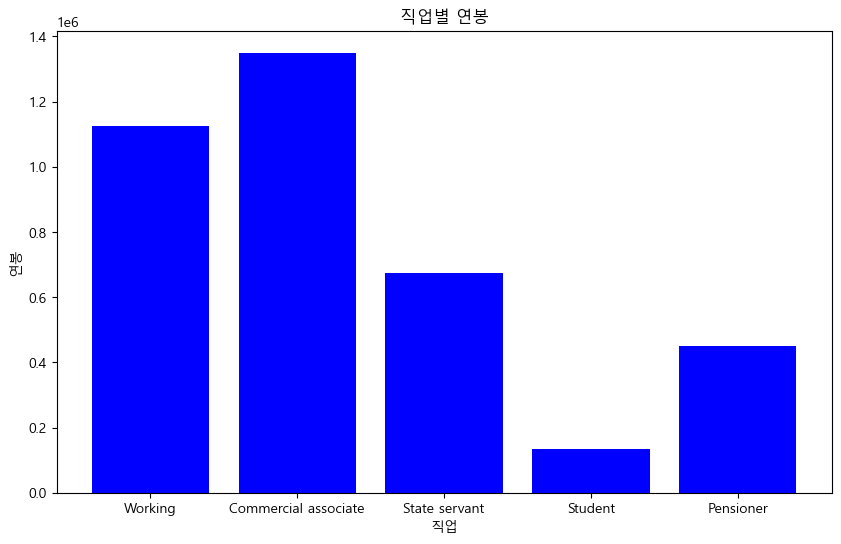

In [208]:
import matplotlib.pyplot as plt

#남자의 직업별 소득 
plt.figure(figsize=(10, 6))
plt.bar(new_df2['NAME_INCOME_TYPE'], new_df2['AMT_INCOME_TOTAL'], color = "b")
plt.xlabel('직업')
plt.ylabel('연봉')
plt.title('직업별 연봉')
plt.xticks(rotation=0)
plt.show() 

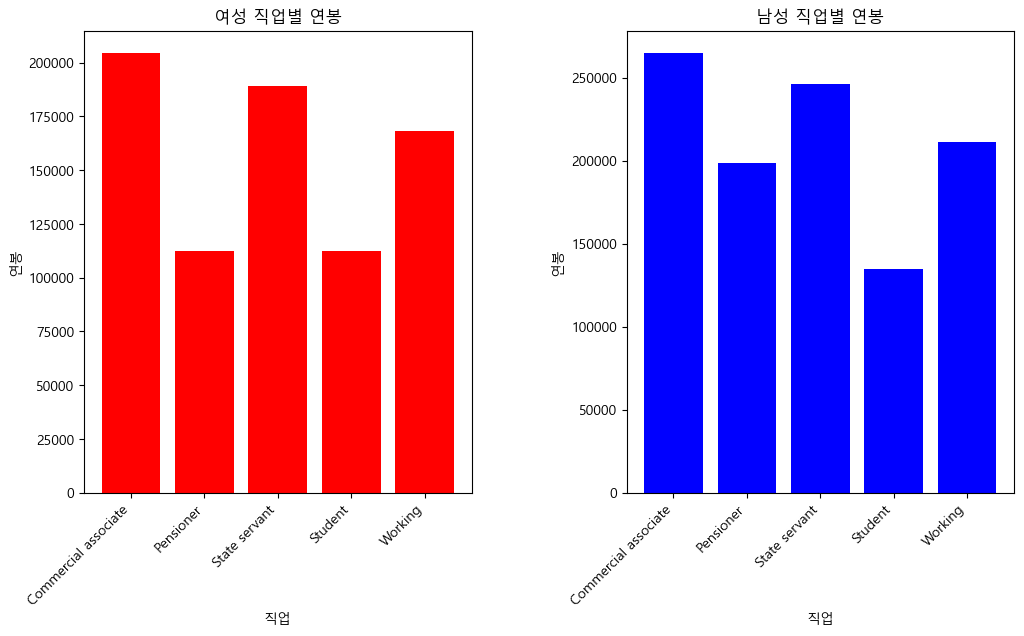

In [212]:
# 여성 남성 한번에 합치기

fig = plt.figure(figsize = (12,6 ))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122) 
#여성 그래프 
new_df_aggregated = new_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().reset_index()
ax1.bar(new_df_aggregated['NAME_INCOME_TYPE'], new_df_aggregated['AMT_INCOME_TOTAL'], color='r')
ax1.set_xlabel('직업')
ax1.set_ylabel('연봉')
ax1.set_title('여성 직업별 연봉')
ax1.set_xticklabels(new_df_aggregated['NAME_INCOME_TYPE'], rotation=45, ha='right')



#남성 그래프 
new_df_aggregated2 = new_df2.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().reset_index()
ax2.bar(new_df_aggregated2['NAME_INCOME_TYPE'], new_df_aggregated2['AMT_INCOME_TOTAL'], color='b')
ax2.set_xlabel('직업')
ax2.set_ylabel('연봉')
ax2.set_title('남성 직업별 연봉')
ax2.set_xticklabels(new_df_aggregated2['NAME_INCOME_TYPE'], rotation=45, ha='right')
 
# 서브프롯간 거리 주기 
plt.subplots_adjust(wspace=0.4)
plt.show()


In [ ]:
# 바 그래프 결론
남여에게 조건을 근로자별 1년(365 일) 이상 일한 직업별 평균 + 월간잔액 6개월이하 , 대출상황 1 달인사람의 직업별 연봉
을 나타냈을때 여성과 남성 둘다 student 와 pensioner 이 제일 작게 분포했지만 남성의 경우 pensioner 가조금 높았고 
    
대체적으로 남성의  평균 연봉이 높았는데. 사업가, 정부관계자 (state servant), 근로자 로는 각각 약 270000, 240000, 210000 이였고
여성의  평균 연봉은  각각 210000, 190000 , 158000 으로 대체적으로 남성이 20~ 30 % 정도 높게 측정됬다. 

# 산포도 그래프    
조건을 준 데이터가 기본적으로 여성이 많고 여성이 대체적으로  2000일(1600~1800 사이(약4~ 5년)) 사이가 
연간소득총액이 170000 부근으로 많고 16년동안 일한사람의 수는 극도로 적다
       
남성의 경우 연간소득총액이 여성에 비해 다양하게 분포되있지만 그래도 200000 부근에 대체적으로 분포되어있고
여성에 비해 16년 이상 일한사람의 수는 여성보다 더 적다
    
남성이 대체적으로 일한 년수에비해 많이 받는경향이 있으며 , 여성은 연간소득이 대체적으로 크게 눈에 뛰진않음
       
    

In [ ]:
# 이제 부터 전처리 해줘야함 . ex) 년도가 없기에 미래에 ~~ 어떤게 성장가능한지 분석이 안되기때문. 
# ex) 자녀수가 연봉 ~ 부터 생기기 시작함 를 분석해서 

# 
# DAYS_BIRTH : 태어난 후로부터 지난 일수 - ex) -12005 : 태어난지 12005일  이걸 이용해서 날짜 계산! 



In [218]:
!pip install pyprind


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [320]:
#테스트 분석 
import pyprind  #프로그레스 바를 표시하기 위해 사용
import pandas as pd  
import os

basepath = 'C:/Users/carlo/Desktop/AI_CWNU/documents/aclImdb'  # 영화 리뷰 데이터셋을 로드하고 전처리하는 과정
    
labels = {'pos': 1, 'neg': 0} #변수에 긍정('pos')과 부정('neg') 레이블에 대한 매핑을 정의
pbar = pyprind.ProgBar(50000)   #  50,000개의 작업을 수행하는 프로그레스 바를 생성 
df = pd.DataFrame()
for s in ('test', 'train'): #이중 for 루프를 사용하여 'test'와 'train' 폴더, 그리고 'pos'와 'neg' 폴더에 접근
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l) #함수를 사용하여 파일 경로를 생성
        for file in sorted(os.listdir(path)):# 해당 경로의 파일들을 정렬
            with open(os.path.join(path, file), 
                      'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],   #데이터프레임에 리뷰 내용(txt)과 해당하는 레이블(labels[l])을 추가
                           ignore_index=True)
            pbar.update()
df.columns = ['review', 'sentiment']

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:38


In [322]:
df.to_csv("movie_data.csv", index = False , encoding= "utf-8")

# BoW(Bag of Word)


In [323]:
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
# 텍스트 데이터를 단어 빈도 벡터로 변환하는 과정

CntVec = CountVectorizer()
bag = CntVec.fit_transform(df["review"][:10000])
#테스트 데이터인 df["review"]의 처음 10,000개를 대상으로 단어 빈도 벡터 변환을 수행

In [260]:
CntVec

CountVectorizer()

In [331]:
CntVec.vocabulary_ #CountVectorizer 객체가 학습한 단어 집합(vocabulary)을 나타내는 속성

{'went': 47831,
 'and': 2096,
 'saw': 37999,
 'this': 43869,
 'movie': 29018,
 'last': 25015,
 'night': 29932,
 'after': 1336,
 'being': 4366,
 'coaxed': 8587,
 'to': 44240,
 'by': 6521,
 'few': 16275,
 'friends': 17458,
 'of': 30611,
 'mine': 28190,
 'll': 25829,
 'admit': 1131,
 'that': 43712,
 'was': 47558,
 'reluctant': 36027,
 'see': 38577,
 'it': 23163,
 'because': 4220,
 'from': 17512,
 'what': 47895,
 'knew': 24453,
 'ashton': 2935,
 'kutcher': 24688,
 'he': 20128,
 'only': 30804,
 'able': 708,
 'do': 12897,
 'comedy': 8874,
 'wrong': 48660,
 'played': 33059,
 'the': 43721,
 'character': 7590,
 'jake': 23294,
 'fischer': 16541,
 'very': 46860,
 'well': 47805,
 'kevin': 24199,
 'costner': 9969,
 'ben': 4464,
 'randall': 35173,
 'with': 48332,
 'such': 42293,
 'professionalism': 34136,
 'sign': 39585,
 'good': 18744,
 'is': 23105,
 'can': 6745,
 'toy': 44569,
 'our': 31129,
 'emotions': 14391,
 'one': 30788,
 'did': 12209,
 'exactly': 15232,
 'entire': 14730,
 'theater': 43727,
 

In [316]:
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer

sentense = ["The apple is delicious",
           "The banana is sweet", 
           "One aplle and two banana please."]

CntVec = CountVectorizer() 

bag = CntVec.fit_transform(sentense)

In [263]:
CntVec

CountVectorizer()

In [264]:
CntVec.vocabulary_

{'the': 9,
 'apple': 2,
 'is': 5,
 'delicious': 4,
 'banana': 3,
 'sweet': 8,
 'one': 6,
 'aplle': 1,
 'and': 0,
 'two': 10,
 'please': 7}

In [324]:
tmp = bag.toarray()
tmp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [268]:
tmp.shape

(3, 11)

# TF - IDF (단어 빈도 -역문서빈도 ) 
#Term Frequency-Inverse Document Frequency
### TF(t , d) : 단어 t 가 문서 d 에 등장하는 단어의 횟수
TF(Term Frequency): 단어 빈도
특정 문서에서 단어가 등장하는 빈도를 나타냅니다.

일반적으로 문서 내에서 단어가 많이 등장할수록 해당 단어의 중요성이 높다고 판단할 수 있습니다.

### DF(t , d) : 단어 t 가 포함된 문서 d 의 수 

DF(Document Frequency): 문서 빈도

특정 단어가 등장하는 문서의 수를 나타냅니다.

여러 문서에 공통적으로 등장하는 단어는 중요도가 낮을 수 있습니다.

### IDF(t , d) : 1 / DF(t,d)           #자주 안쓰일수록 IDF 값이 커짐 
IDF(Inverse Document Frequency): 역문서 빈도

전체 문서 수를 해당 단어가 등장하는 문서의 수로 나눈 값의 로그 역수를 의미합니다.

특정 단어가 전체 문서에 희귀하게 등장할수록 해당 단어의 중요성이 높아집니다.

IDF는 로그를 사용하여 단어의 가중치를 부여하므로, 흔하게 등장하는 단어의 IDF 값은 낮고 희귀하게 등장하는 단어의 IDF 값은 높습니다

### TF - IDF : TF * iDF   
TF-IDF(Term Frequency-Inverse Document Frequency)

TF와 IDF를 곱한 값으로, 단어의 상대적인 중요성을 나타내는 지표입니다.

특정 문서에서 단어의 빈도가 높고 전체 문서에서 희귀하게 등장하는 단어일수록 높은 TF-IDF 값을 갖게 됩니다.

TF-IDF를 계산하여 단어의 가중치를 추출하면, 특정 문서에서 중요한 단어를 감지하거나 문서 간 
유사성을 비교하는 등의 다양한 텍스트 마이닝 작업에 활용할 수 있습니다.

In [325]:
from sklearn.feature_extraction.text import TfidfTransformer # TF-IDF 가중치를 계산하기 위한 변환기입

tfidf = TfidfTransformer(use_idf=True , norm="l2" , smooth_idf=True)  
 #IDF를 사용하겠다는 의미 , 
 #norm="l2"는 각 벡터의 L2 정규화를 수행하여 단어 벡터의 크기를 조절 , 
 #smooth_idf=True는 IDF에 smoothing을 적용하여 모든 문서에 등장하지 않는 단어의 IDF 값이 0 되는 것을 방지
    
tfidf.fit_transform(tmp).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [326]:
X_train = df.loc[:25000, "review"].values
y_train = df.loc[:25000, "sentiment"].values
X_test = df.loc[:25000, "review"].values
y_test = df.loc[:25000, "sentiment"].values

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


#주어진 텍스트 데이터에서 단어의 빈도와 역문서 빈도를 계산 TF-IDF 피처 벡터를 생성
tfidf = TfidfVectorizer(strip_accents = None , # 악센트 기호를 제거하지 않고 유지함을 의미
                        lowercase = False ,    # 소문자 변환을 수행하지 않음을 의미
                        preprocessor = None ,  # 텍스트 전처리 함수를 사용하지 않음을 의미
                       stop_words = None ,     #불용어를 제거하지 않음을 의미
                       ngram_range = (1,1))    #피처로 사용할 단어의 범위를 1-그램으로 설정하는 것을 의미

tfidf_lr = Pipeline([("tfidf",tfidf), 
             ("lr" , LogisticRegression(solver= "liblinear" , #  로지스틱 회귀의 최적화 알고리즘으로 liblinear를 사용한다는 의
                                        C = 10,               #  높은 값일수록 규제가 약해지는 것을 의미
                                        penalty = "l2"        #  L2 규제를 사용함을 의미
                                        random_state= 0))])   #  재현 가능한 결과를 얻기 위해 난수 생성 시드를 설정


In [328]:
tfidf_lr.fit(X_train , y_train) # TF-IDF 피처 벡터화와 로지스틱 회귀 모델을 학습하는 과정

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('lr',
                 LogisticRegression(C=10, random_state=0, solver='liblinear'))])

In [329]:
p_test = tfidf_lr.predict(X_test)#학습된 TF-IDF 피처 벡터화와 로지스틱 회귀 모델을 사용하여
                                 #테스트 데이터 X_test에 대한 예측을 수행하는 과정

In [330]:
from sklearn.metrics import f1_score , confusion_matrix, accuracy_score
#F1 점수는 정밀도(precision)와 재현율(recall)의 조화 평균으로 계산되며, 이진 분류에서 모델의 예측 성능을 평가하는 지표 ,
#F1 점수는 0부터 1까지의 값을 가지며, 1에 가까울수록 모델의 성능이 좋다는 의미


print(f1_score(y_test , p_test))
print(accuracy_score(y_test, p_test)) #제 레이블 y_test와 예측된 레이블 p_test 간의 정확도(accuracy)를 계산하는 함수
print(confusion_matrix(y_test , p_test)) # 오차 행렬(confusion matrix)을 계산하는 함수 
#. 오차 행렬은 주 대각선을 기준으로 
#진짜 양성(True Positive), 진짜 음성(True Negative), 
#거짓 양성(False Positive), 거짓 음성(False Negative) 의 개수를 나타냄

0.9924030387844863
0.9924003039878405
[[12401    99]
 [   91 12410]]


In [ ]:
#이런건 메일서비스 같은데 스팸분류하는데 많이 씀